In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [29]:
#load data
df = pd.read_csv("CustSpendPred.csv")

# Check data
df.head()

,Unit Price,Profit,Sales,Responder
0,2,-5,2,0
1,2,-11,3,0
2,3,38,3,0
3,3,1,3,0
4,3,-8,3,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unit Price  1952 non-null   int64
 1   Profit      1952 non-null   int64
 2   Sales       1952 non-null   int64
 3   Responder   1952 non-null   int64
dtypes: int64(4)
memory usage: 61.1 KB


In [31]:
df.columns

Index(['Unit Price', 'Profit', 'Sales', 'Responder'], dtype='object')

In [32]:
# check whether the data has NA
# df.isnull().sum()

# Remove null values
# df.dropna(inplace = True)

# EDA

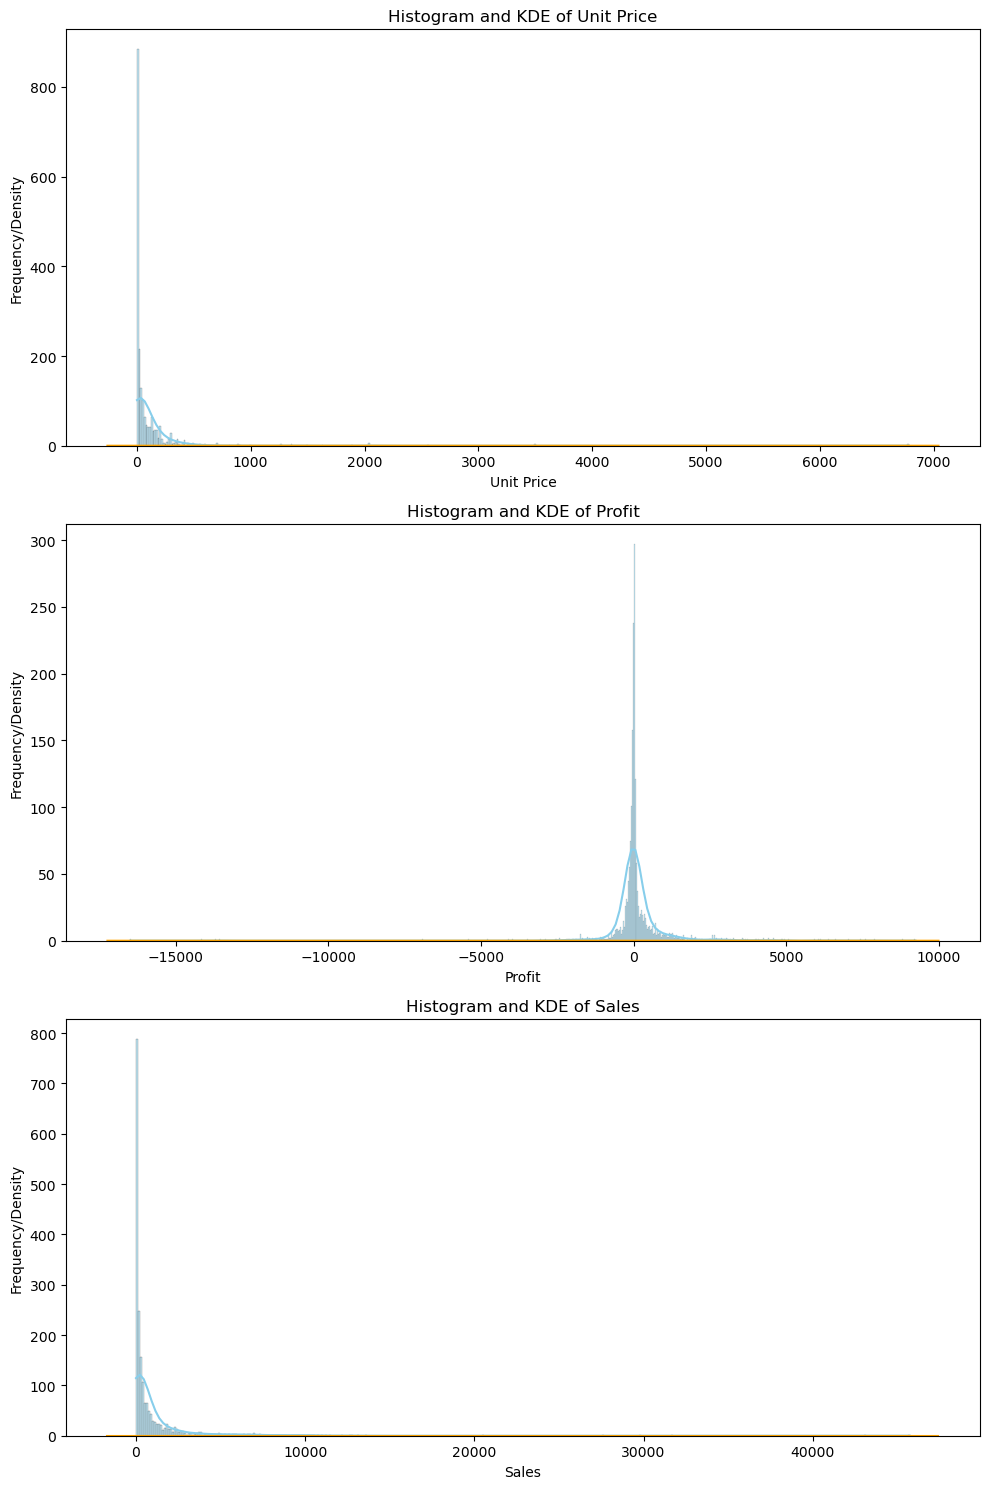

In [33]:

def plot_distribution(df):
    fig, ax = plt.subplots(3, 1, figsize=(10, 15))

    for i, col in enumerate(['Unit Price', 'Profit', 'Sales']):
        sns.histplot(df[col], ax=ax[i], kde=True, color='skyblue')
        sns.kdeplot(df[col], ax=ax[i], color='orange')
        ax[i].set_title(f'Histogram and KDE of {col}')
        ax[i].set_xlabel(col)
        ax[i].set_ylabel('Frequency/Density')

    plt.tight_layout()
    plt.show()
plot_distribution(df)

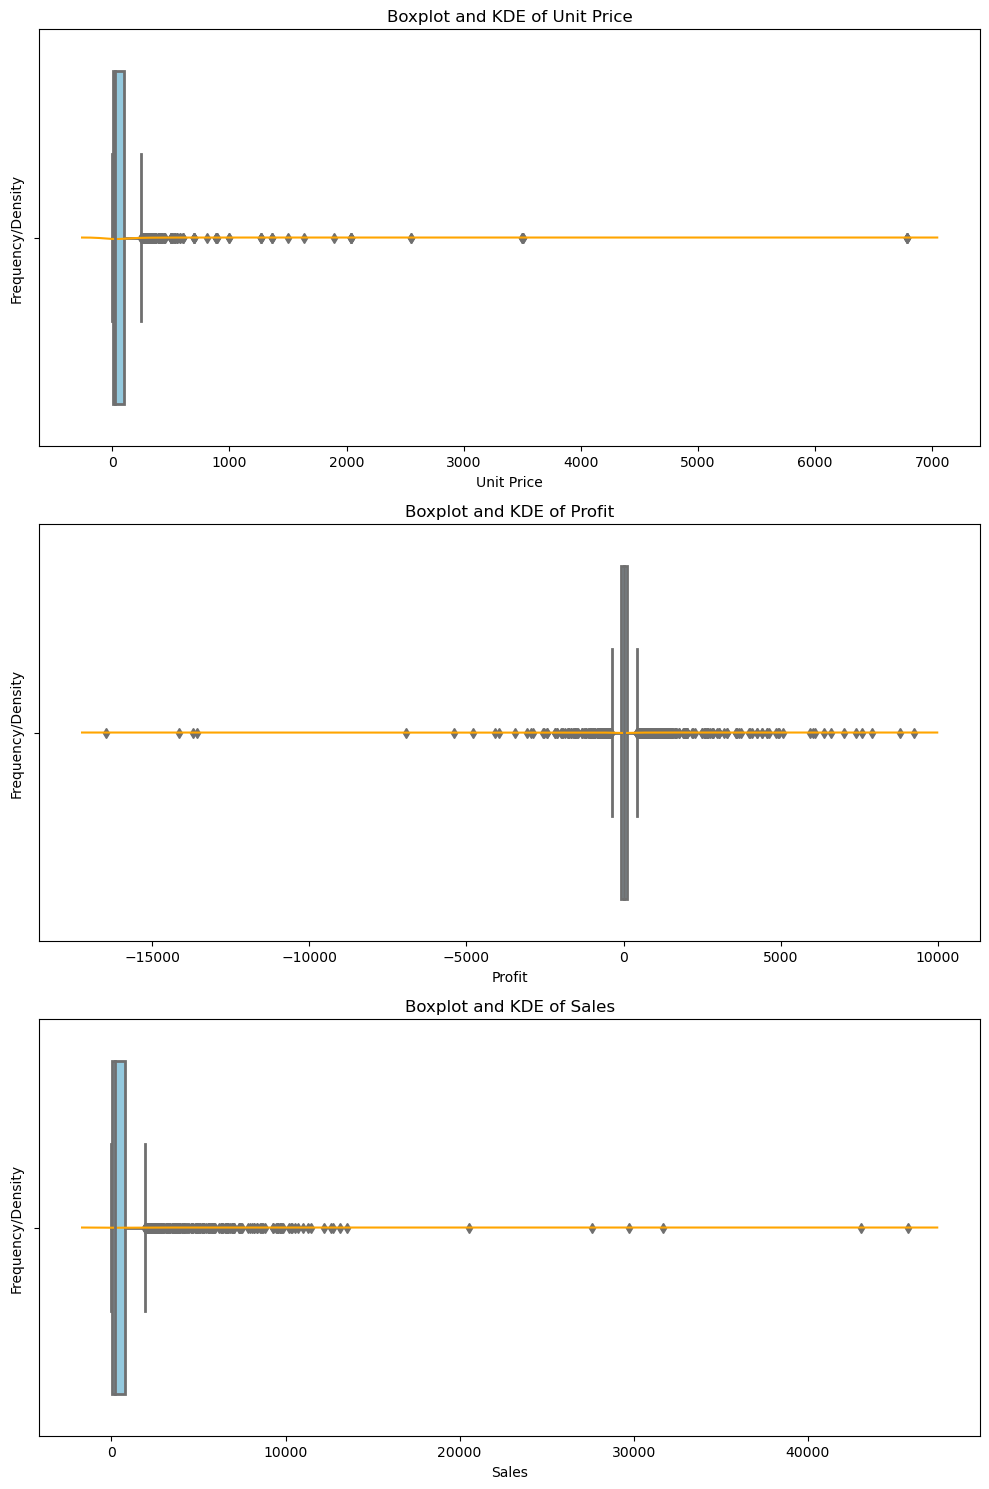

In [34]:
def plot_box(df):
    fig, ax = plt.subplots(3, 1, figsize=(10, 15))

    for i, col in enumerate(['Unit Price', 'Profit', 'Sales']):
        sns.boxplot(x=df[col], ax=ax[i], color='skyblue', linewidth=2)
        sns.kdeplot(df[col], ax=ax[i], color='orange')
        ax[i].set_title(f'Boxplot and KDE of {col}')
        ax[i].set_xlabel(col)
        ax[i].set_ylabel('Frequency/Density')

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame containing the data
plot_box(df)

In [35]:
#Change text to integers data type.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

In [36]:
df.head()

,Unit Price,Profit,Sales,Responder
0,2,-5,2,0
1,2,-11,3,0
2,3,38,3,0
3,3,1,3,0
4,3,-8,3,0


In [37]:
def decision_tree(df):
    # Define x and y variables
    X = df.drop('Responder', axis=1)
    Y = df['Responder']
    
    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    
    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Build the model
    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)

    # Evaluate the results using accuracy score with train data
    train_score = model.score(X_train, Y_train)
    print("Train score: ", train_score)

    # Evaluate the results using accuracy score with test data
    test_score = model.score(X_test, Y_test)
    print("Test score: ", test_score)

    # Check confusion matrix 
    cm = confusion_matrix(Y_test, model.predict(X_test))
    print("Confusion Matrix:")
    print(cm)

    # Check classification report
    cr = classification_report(Y_test, model.predict(X_test))
    print("Classification Report:")
    print(cr)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Plotting the decision tree
    plt.figure(figsize=(20,10))  # Adjust the figure size as needed
    plot_tree(model, filled=True, feature_names=X.columns.tolist())
    plt.show()

Train score:  1.0
Test score:  0.9974424552429667
Confusion Matrix:
[[256   1]
 [  0 134]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       0.99      1.00      1.00       134

    accuracy                           1.00       391
   macro avg       1.00      1.00      1.00       391
weighted avg       1.00      1.00      1.00       391



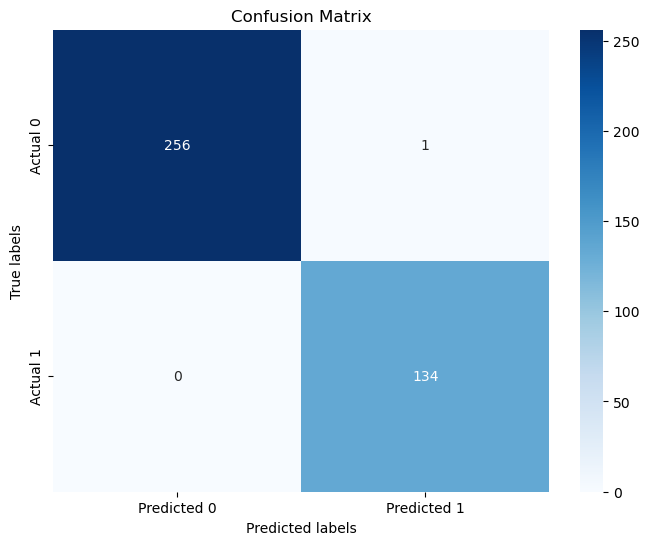

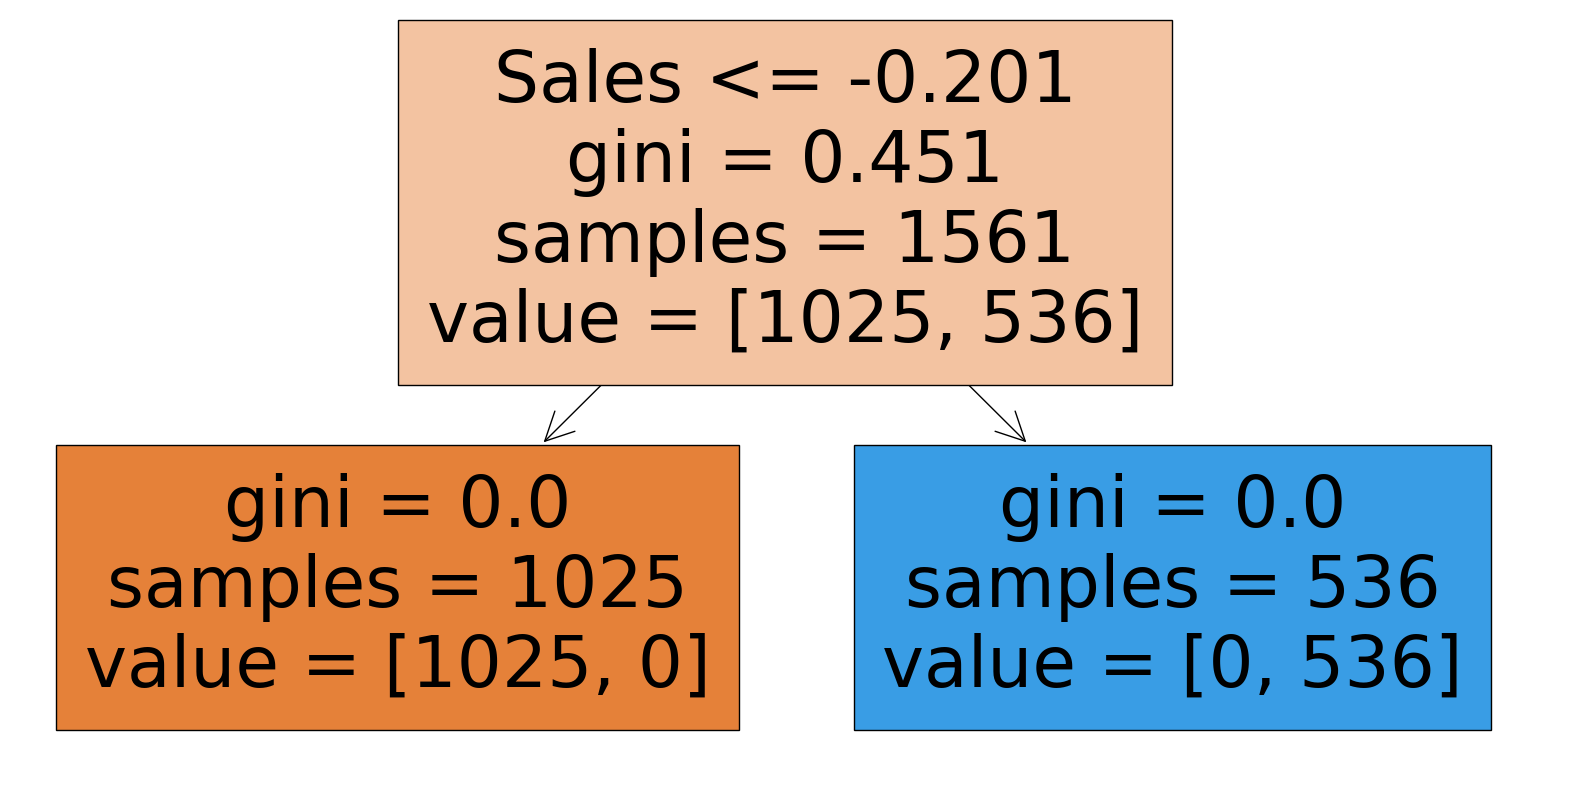

In [38]:
decision_tree(df)

# Remove outlier

In [39]:
def detect_outliers_iqr(df, columns):
    total_outliers = 0
    rows_with_outliers = set()  # To keep track of unique row indices with outliers
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        rows_with_outliers.update(outliers.index)
        num_outliers = len(outliers)
        total_outliers += num_outliers
        
        print(f"Number of outliers in {col}: {num_outliers}")
    
    print(f"Total rows containing outliers: {len(rows_with_outliers)}")

# Example usage:
# Assuming 'df' is your DataFrame containing the data and 'columns' is the list of columns to check
detect_outliers_iqr(df, ['Unit Price', 'Profit', 'Sales'])


Number of outliers in Unit Price: 176
Number of outliers in Profit: 426
Number of outliers in Sales: 251
Total rows containing outliers: 529


In [40]:
# remove outliers

# Define function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of columns to remove outliers from
columns_to_clean = ['Unit Price', 'Profit', 'Sales']

# Remove outliers from specified columns
df_cleaned = remove_outliers_iqr(df, columns_to_clean)

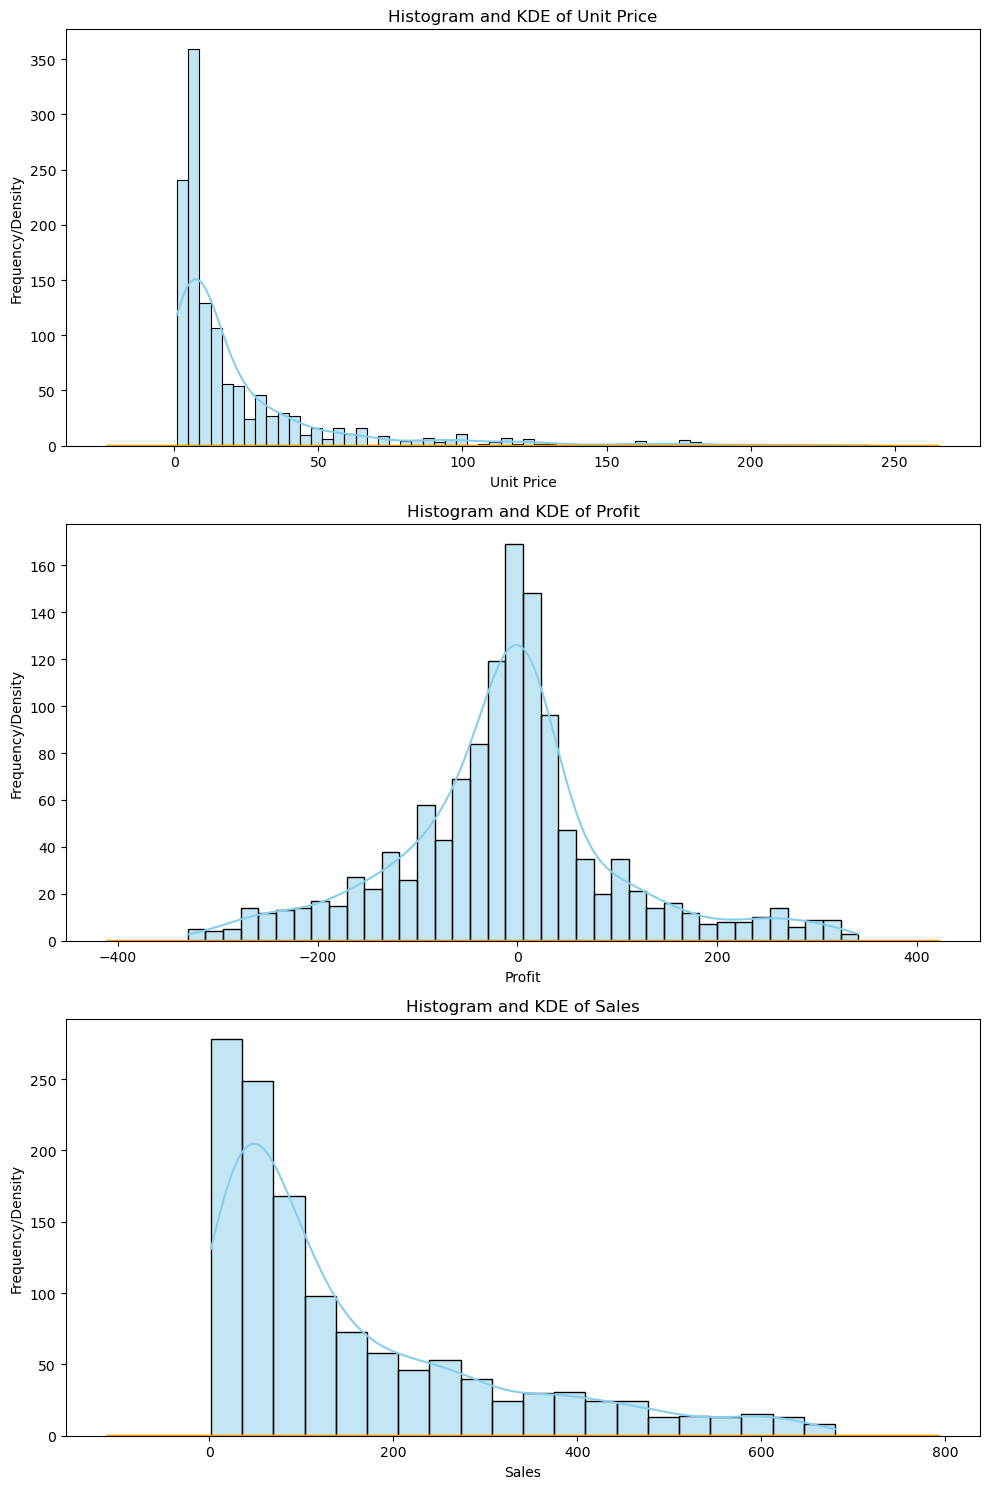

In [41]:
plot_distribution(df_cleaned)

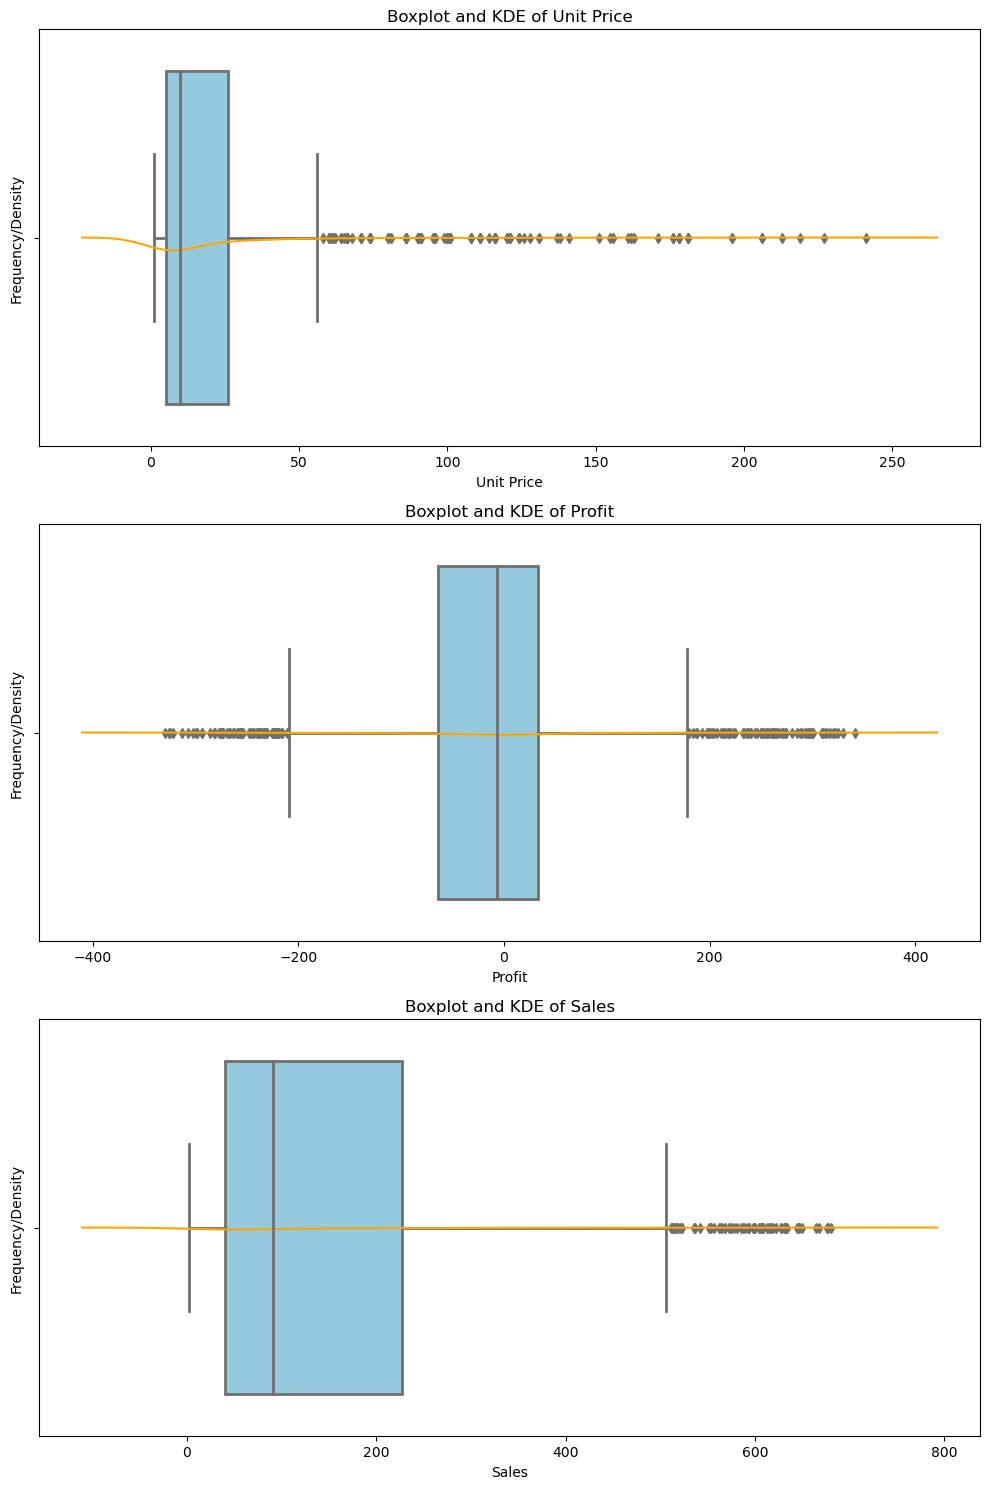

In [42]:
plot_box(df_cleaned)

Train score:  1.0
Test score:  1.0
Confusion Matrix:
[[241   0]
 [  0  14]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00        14

    accuracy                           1.00       255
   macro avg       1.00      1.00      1.00       255
weighted avg       1.00      1.00      1.00       255



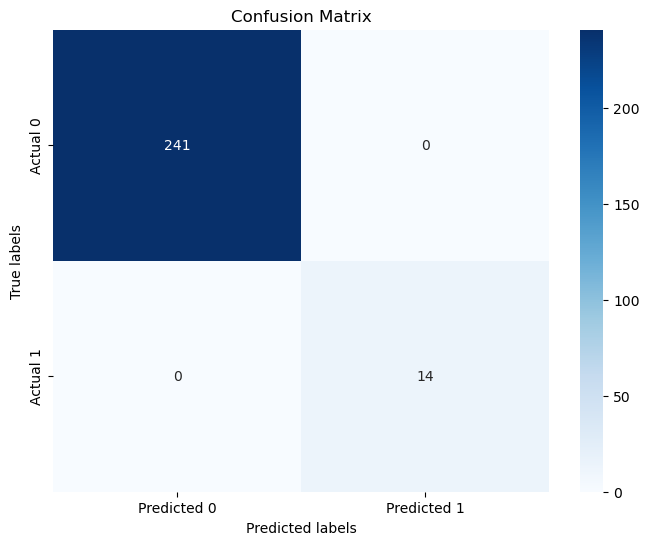

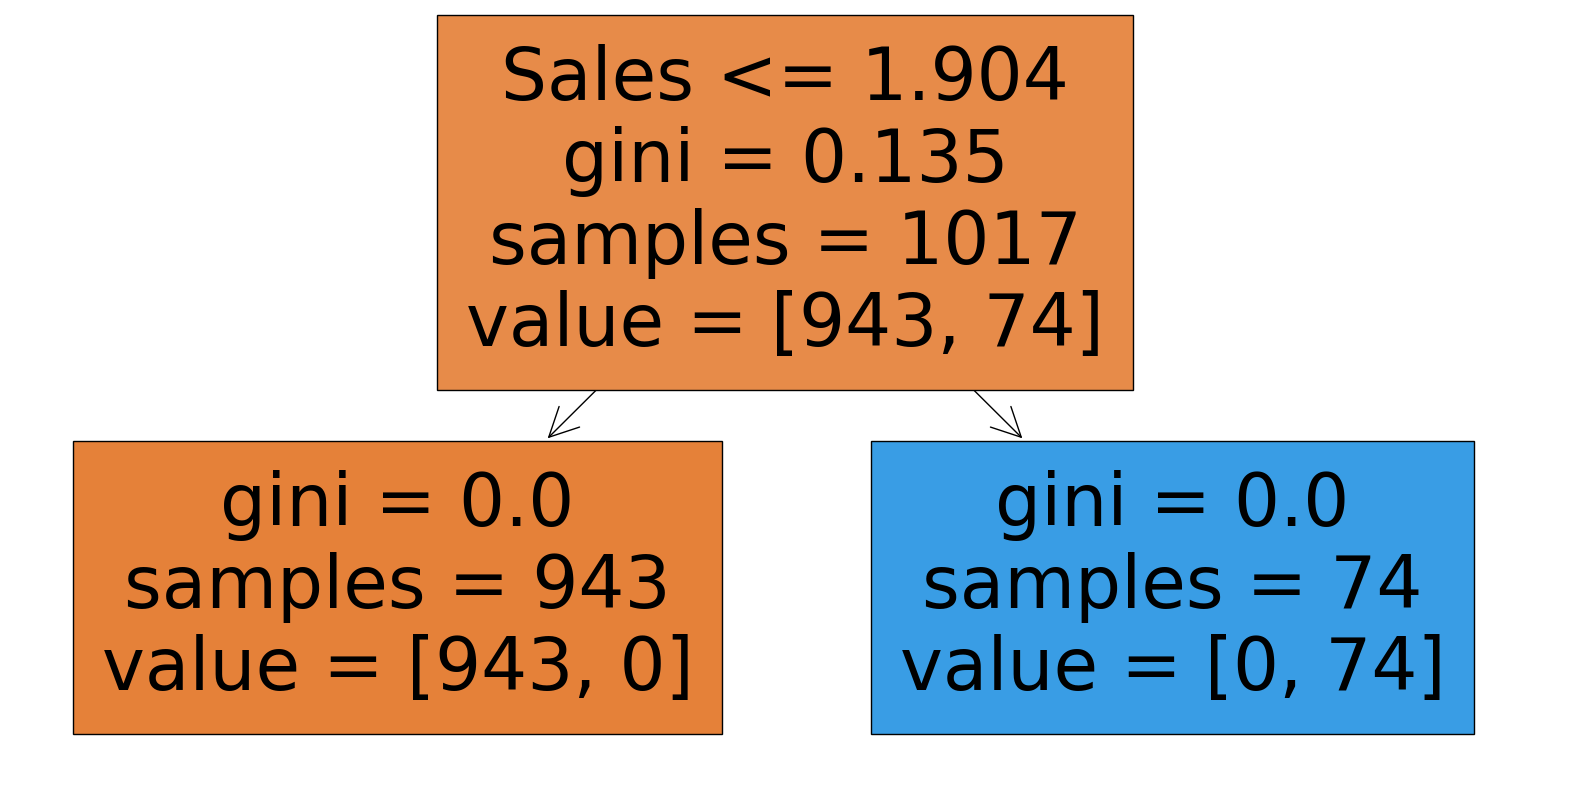

In [43]:
decision_tree(df_cleaned)